## Python Exercises: Toy VCF Example
This code provides introductory examples for using genomic data in Python.
Make sure that the provided data is in the './data' directory. 


Question 1: Read the entirety of a file to a variable `data_as_list`. Each list element is a row of the file that was read from. 

In [59]:
#Read in a file. 
data_file = open("./data/example.vcf", mode = "r")
data_as_list = data_file.readlines()

data_file.close()
print(data_as_list[0:10])


['CHROM\tPOS\tREF\tALT\tAC\tAF\tpopmax\n', 'chr22\t10511415\tA\tT\t42\t0.0011961\tamr\n', 'chr4\t10840\tC\tT\t2\t2.53421e-05\tsas\n', 'chr10\t10617\tG\tC\t748\t0.0123645\teas\n', 'chrY\t2794450\tC\tA\t1\t2.97089e-05\teas\n', 'chr10\t10662\tA\tG\t1\t2.4286e-05\tnfe\n', 'chr16\t10187\tA\tT\t2\t1.54212e-05\tamr\n', 'chr12\t11154\tG\tT\t1\t7.77291e-06\teas\n', 'chr16\t10553\tA\tT\t1\t9.6341e-06\tafr\n', 'chr13\t18172007\tC\tA\t1\t6.57134e-06\teas\n']


Question 2: Each row has elements that are separated by a tab (`\t`) character. Also, the last character in the list is a newline (`\n`) character. 
<br><br>
Remove the newline character and split each of these rows into a list of elements.  
<br><br>
HINT: The result will be a two dimensional list, or a "list of lists".


In [60]:
for i in range(0, len(data_as_list)):
    data_as_list[i] = data_as_list[i].rstrip("\n").split("\t")

print(data_as_list[0:10])

[['CHROM', 'POS', 'REF', 'ALT', 'AC', 'AF', 'popmax'], ['chr22', '10511415', 'A', 'T', '42', '0.0011961', 'amr'], ['chr4', '10840', 'C', 'T', '2', '2.53421e-05', 'sas'], ['chr10', '10617', 'G', 'C', '748', '0.0123645', 'eas'], ['chrY', '2794450', 'C', 'A', '1', '2.97089e-05', 'eas'], ['chr10', '10662', 'A', 'G', '1', '2.4286e-05', 'nfe'], ['chr16', '10187', 'A', 'T', '2', '1.54212e-05', 'amr'], ['chr12', '11154', 'G', 'T', '1', '7.77291e-06', 'eas'], ['chr16', '10553', 'A', 'T', '1', '9.6341e-06', 'afr'], ['chr13', '18172007', 'C', 'A', '1', '6.57134e-06', 'eas']]


Question 3: The first row is the column headers, and the rest of the rows are the data for a variant. 
<br><br>
Save the header into a different variable called `header` and remove that row from the rest of the data.
<br><br>

In [61]:
header = data_as_list[0]
del data_as_list[0] 

Question 4:<br>
The header columns are as follows: 
<ul>
    <li>CHROM:  The chromosome the variant is on.</li>
    <li>POS:    The position the variant is on the chromosome.</li>
    <li>REF:    The reference allele (wild-type base) at that position.</li>
    <li>ALT:    The alternate allele (mutant bae) at that position.</li>
    <li>AC:     Allele count. The number of genomes this allele appears in this position in gnomAD.</li>
    <li>AF:     Allele frequency. The allele count normalized by the population size.</li>
    <li>popmax: The population where this allele is most prevalent.</li>
</ul>
<br>
Each row after the header is the data for these columns for each variant. Visualize the first variant below and interpret the meaning of the row given the header context. 


In [62]:
print(header)
print(data_as_list[0])

"""



Interpretation goes here




"""

['CHROM', 'POS', 'REF', 'ALT', 'AC', 'AF', 'popmax']
['chr22', '10511415', 'A', 'T', '42', '0.0011961', 'amr']


'\n\n\n\nInterpretation goes here\n\n\n\n\n'

Question 5: Currently, the data is in a 2-D list format, which can be used to access data using indices in the format `data[row][column]`. For example, `data[10][2]` returns the reference allele (column 2) of the 10th variant.  
<br><br>
Another common representation is a dictionary structure. A dictionary structure follows the format `dict[key] = value`, where a `key` can be a string and `value` can be anything; an integer, a string, or even other data structures like lists and dictionaries. 
<br><br>
We can use dictionaries with the same idea as 2-D lists, where each `key` is a column and each `value` is a list of values in that column. 
<br><br>
For this question, create a dictionary (defined using {}) using our header columns as keys and empty lists as placeholder values. 


In [63]:
data_as_dict = {}
for col in header: 
    data_as_dict[col] = []

print(data_as_dict)

{'CHROM': [], 'POS': [], 'REF': [], 'ALT': [], 'AC': [], 'AF': [], 'popmax': []}


Question 6: Now that we have a dictionary, put the contents of each column into each respective dictionary key. 

In [64]:
for row in data_as_list:
    data_as_dict["CHROM"].append(row[0])
    data_as_dict["POS"].append(row[1])
    data_as_dict["REF"].append(row[2])
    data_as_dict["ALT"].append(row[3])
    data_as_dict["AC"].append(row[4])
    data_as_dict["AF"].append(row[5])
    data_as_dict["popmax"].append(row[6])

## BONUS: Do with a nested loop. 
if False:
    for row in data_as_list:
        for j in range(0, len(header)):
            data_as_dict[header[j]].append(row[j])


Both of these formats are good for different purposes. For finding per-variant information, the `data_as_list` format might be preferable, whereas the `data_as_dict` format might be better if you're interested in information per column. For the rest of the exercises, we'll use both. 

**BONUS**: You can make `data_as_list` and `data_as_dict` directly while reading in the data file. Give this a try!

In [65]:
#Setup our header and data_as_dict. 
data_file = open("./data/example.vcf", mode = "r")
header = data_file.readline().rstrip("\n").split("\t")
data_as_dict = {}

for col in header:
    data_as_dict[col] = []

#Setup our data_as_list. 
data_as_list = []

#Read in the rest of the data. 
for line in data_file:
    #Get split data for row. 
    row = line.rstrip("\n").split("\t")

    #Add this row to the data_as_list. 
    data_as_list.append(row)

    #Add row values to respective columns in data_as_dict. 
    for j in range(0, len(header)):
        data_as_dict[header[j]].append(row[j])

data_file.close()

Question 7: Data types are important in Python. When a string is split as was done in Question 2, the elements are all `str` types. For this question, convert POS and AC to `int` and AF to `float` in both `data_as_dict` and `data_as_list`. 

In [66]:
#Data as list. 
for row in data_as_list:
    row[1] = int(row[1])
    row[4] = int(row[4])
    row[5] = float(row[5])

#Data as dict. 
for i in range(0, len(data_as_dict['POS'])):
    data_as_dict['POS'][i] = int(data_as_dict['POS'][i])
    data_as_dict['AC'][i] = int(data_as_dict['AC'][i])
    data_as_dict['AF'][i] = float(data_as_dict['AF'][i])

Now this data can be used for calculations. 

Question 8: Find the mean allele frequency (AF) for the variants in our data. 

In [67]:
print(sum(data_as_dict['AF'])/len(data_as_dict['AF']))

0.00891554321129999


Question 9: Find the median allele count for the variants in our data. 
<br><br>
HINT: The `sorted` function can sort a list. 

In [69]:
ac_sort = sorted(data_as_dict['AC'])
print(ac_sort[int(len(ac_sort)/2)])

2


Question 10: Extract the entire row that has the most allele count.
<br><br>

HINT: This can be solved with either `data_as_dict` or `data_as_list`, or even using both! Some might be easier than the other. 

In [71]:
#Data as list. 
max_val = 0
max_row = []
for row in data_as_list: 
    if row[4] > max_val:
        max_val = row[4] 
        max_row = row 

#Data as dict. 
max_val = max(data_as_dict['AC'])
max_row = []
i = 0
while i < len(data_as_dict['AC']) and len(max_row) == 0:
    if data_as_dict['AC'][i] == max_val:
        for col in data_as_dict.keys():
            max_row.append(data_as_dict[col][i])
    i += 1

#Both. 
max_val = max(data_as_dict['AC'])
max_row = []
i = 0
while i < len(data_as_list) and len(max_row) == 0:
    if data_as_list[i][4] == max_val:
        max_row = data_as_list[i]
    i += 1

print(max_row)

['chr3', 11919, 'C', 'A', 115034, 0.76396, 'nfe']


Question 11: Popular plotting packages in python include Matplotlib.pyplot and Seaborn. Use both to plot the counts of "popmax". 

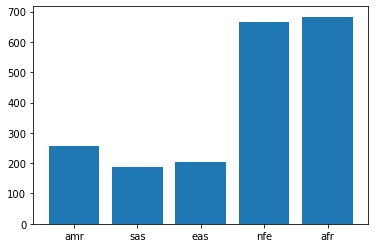

/uufs/chpc.utah.edu/common/HIPAA/u1321706/software/pkg/miniconda3/envs/SeqDesign/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

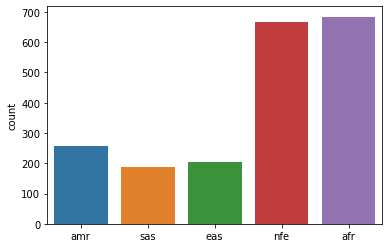

In [76]:
import seaborn as sns 
import matplotlib.pyplot as plt 

#For matplotlib, need to have counts ready. 
pop_counts = {}
for item in data_as_dict['popmax']:
    if item in pop_counts.keys():
        pop_counts[item] += 1 
    else:
        pop_counts[item] = 0
        
plt.bar(pop_counts.keys(), height = pop_counts.values())
plt.show()

#Seaborn can use "countplot" to automate this process. 
sns.countplot(data_as_dict['popmax'])